# $\Large{\color{darkblue}{\textbf{KNN vs Naive Bayes vs k-means clustering}}}$

# $\large{\color{darkred}{1.}}$ $\large{\color{darkblue}{\textbf{Importing Libraries}}}$ $\color{red}{✓}$

# ${\color{darkred}{1.1.}}$ ${\color{darkblue}{\textbf{Standard libraries}}}$ $\color{red}{✓}$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import os

# ${\color{darkred}{1.2.}}$ ${\color{darkblue}{\textbf{KNN and MultinomialNB - GaussianNB}}}$ $\color{red}{✓}$

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

# ${\color{darkred}{1.3.}}$ ${\color{darkblue}{\textbf{Data split, fine-tuning and Analysis}}}$ $\color{red}{✓}$

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler

# $\large{\color{darkred}{2.}}$ $\large{\color{darkblue}{\textbf{Reading the data}}}$ $\color{red}{✓}$

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
x_test = pd.read_csv('/kaggle/input/titanic/test.csv')
y_test = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
pd.set_option("display.max_columns", 12)
train_data.head()

In [ ]:
train_data.shape

In [ ]:
x_test.shape

# $\large{\color{darkred}{3.}}$ $\large{\color{darkblue}{\textbf{Data Preprocessing}}}$

In [ ]:
train_data.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis = 1, inplace = True)
x_test.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis = 1, inplace = True)
y_test.drop(["PassengerId"], axis = 1, inplace = True)

# ${\color{darkred}{3.1.}}$ ${\color{darkblue}{\textbf{Codification of Categorical variables}}}$  $\color{red}{✓}$

In [ ]:
train_data["Sex"] = np.where(train_data["Sex"] == "female", 1, 0)
x_test["Sex"] = np.where(x_test["Sex"] == "female", 1, 0)

# ${\color{darkred}{3.2.}}$ ${\color{darkblue}{\textbf{Missing Values Treatment}}}$  $\color{red}{✓}$

${\color{darkred}{\textbf{train_data}}}$ $\color{blue}{✓}$

In [ ]:
Missing_values_percent = 100*(train_data.isnull().sum()/len(train_data["Sex"]))
print(Missing_values_percent)

In [ ]:
sbn.displot(train_data["Age"], kde = True, bins = 40)
plt.show()

In [ ]:
train_data["Age"].fillna(train_data["Age"].mean(), inplace = True)

In [ ]:
sbn.displot(train_data["Age"], kde = True, bins = 20)
plt.show()

In [ ]:
Missing_values_percent = 100*(train_data.isnull().sum()/len(train_data["Sex"]))
print(Missing_values_percent)

${\color{darkred}{\textbf{x_test}}}$ $\color{blue}{✓}$

In [ ]:
Missing_values_percent_test = 100*(x_test.isnull().sum()/len(x_test["Sex"]))
print(Missing_values_percent_test)

In [ ]:
sbn.displot(x_test["Age"], kde = True, bins = 30)
plt.show()

In [ ]:
x_test["Age"].fillna(x_test["Age"].mean(), inplace = True)

In [ ]:
sbn.displot(x_test["Age"], kde = True, bins = 20)
plt.show()

In [ ]:
x_test["Fare"].fillna(x_test["Fare"].mean(), inplace = True)

In [ ]:
Missing_values_percent_test = 100*(x_test.isnull().sum()/len(x_test["Sex"]))
print(Missing_values_percent_test)

# ${\color{darkred}{3.3.}}$ ${\color{darkblue}{\textbf{dtypes}}}$ $\color{red}{✓}$

In [ ]:
train_data.dtypes

In [ ]:
x_test.dtypes

In [ ]:
y_test.dtypes

# ${\color{darkred}{3.4.}}$ ${\color{darkblue}{\textbf{Correlation}}}$ $\color{red}{✓}$

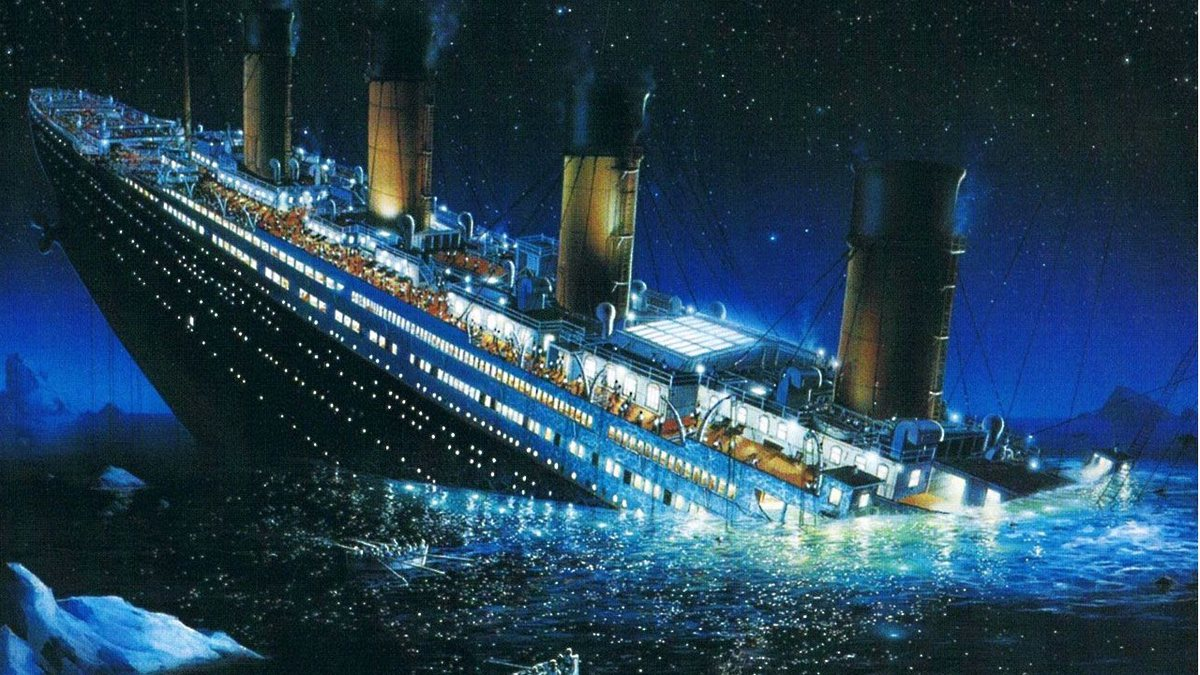

In [ ]:
plt.figure(figsize = (7,6))
Datacopy1 = train_data.copy()
Datacopy1['Sex'] = Datacopy1['Sex'].replace({1: 'female', 0: 'male'})
sbn.countplot(x= "Sex", hue= "Survived", data = Datacopy1)
plt.show()

${\color{darkred}{\textbf{The survival rate for women was higher than for men.}}}$

In [ ]:
plt.figure(figsize = (6,6))
Yes_Survived_train = Datacopy1.loc[train_data["Survived"] == 1]
Yes_Survived_train = Yes_Survived_train["Sex"]
Yes_Survived_train.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Survivors")
plt.show()

In [ ]:
plt.figure(figsize = (6,6))
NO_Survived_train = Datacopy1.loc[train_data["Survived"] == 0]
NO_Survived_train = NO_Survived_train["Sex"]
NO_Survived_train.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("No Survivors")
plt.show()

In [ ]:
plt.figure(figsize = (7,6))
Datacopy2 = train_data.copy()
Datacopy2['Pclass'] = Datacopy2['Pclass'].replace({3: '3rd', 2: '2nd', 1: '1st'})
sbn.countplot(x= "Pclass", hue= "Survived", data = Datacopy2)
plt.show()

${\color{darkred}{\textbf{Heatmap}}}$

In [ ]:
plt.figure(figsize = (10,8))
sbn.heatmap(train_data.corr(), annot = True, vmin = 0, cmap = "coolwarm")
plt.show()

In [ ]:
triu = np.triu(train_data.corr())
plt.figure(figsize = (10,8))
sbn.heatmap(train_data.corr(), annot = True, vmin = 0, vmax = 1, cmap = "coolwarm", mask = triu)
plt.show()

In [ ]:
tril = np.tril(train_data.corr())
plt.figure(figsize = (10,8))
sbn.heatmap(train_data.corr(), annot = True, vmin = 0, vmax = 1, cmap = "coolwarm", mask = tril)
plt.show()

${\color{darkred}{\textbf{Medium (-.3 to -.5) correlation (-): Pclass and Survived - Pclass and Age}}}$

${\color{darkred}{\textbf{Medium (.3 to .5) correlation (+): SibSp and	Parch}}}$

${\color{darkred}{\textbf{Large (-.5 to -1.0) correlation (-): Pclass and Fare}}}$

${\color{darkred}{\textbf{Large (.5 to 1.0) correlation (+): Sex and Survived}}}$

# ${\color{darkred}{3.5.}}$ ${\color{darkblue}{\textbf{Data train split}}}$ $\color{red}{✓}$

In [ ]:
norm = MinMaxScaler(feature_range = (0, 1))
x_train = train_data.drop(["Survived"], axis = 1)
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)
y_train = train_data["Survived"]

# $\large{\color{darkred}{4.}}$ $\large{\color{darkblue}{\textbf{KNN}}}$ $\color{red}{✓}$

In [ ]:
ModelKNN = KNeighborsClassifier()

In [ ]:
# Fine-tuning
K_values = np.array([2, 3, 5, 7, 9, 11])
metric = ["minkowski", "chebyshev"]
p = np.array([1, 2, 3, 4])
param_grid = {"n_neighbors": K_values, "metric": metric, "p": p}
GridKNN = GridSearchCV(estimator = ModelKNN, param_grid = param_grid,cv = 5)
GridKNN.fit(x_train, y_train)

In [ ]:
print(GridKNN.best_score_)
print(GridKNN.best_estimator_.n_neighbors)
print(GridKNN.best_estimator_.metric)
print(GridKNN.best_estimator_.p)

In [ ]:
ModelKNN = KNeighborsClassifier(n_neighbors=5, p=1, metric = "minkowski")
ModelKNN.fit(x_train, y_train)

${\color{darkred}{\textbf{Prediction}}}$

In [ ]:
y_pred = ModelKNN.predict(x_test)

# ${\color{darkred}{4.1}}$ ${\color{darkblue}{\textbf{Confusion matrix}}}$ $\color{red}{✓}$

In [ ]:
Matrix = confusion_matrix(y_test, y_pred)
print(Matrix)

In [ ]:
plt.figure(figsize = (7,5))
sbn.heatmap(Matrix, annot = True, vmin = 0,vmax = 300, cmap = "coolwarm")
plt.show()

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"f1_score: {f1_score(y_test, y_pred)}")

# $\large{\color{darkred}{5.}}$ $\large{\color{darkblue}{\textbf{Naive Bayes}}}$ $\color{red}{✓}$

In [ ]:
ModelNBGaussian = GaussianNB()
ModelNBMultino = MultinomialNB()
ModelNBGaussian.fit(x_train, y_train)
ModelNBMultino.fit(x_train, y_train)

${\color{darkred}{\textbf{Prediction}}}$

In [ ]:
y_predGaussian = ModelNBGaussian.predict(x_test)
y_predMultino = ModelNBMultino.predict(x_test)

# ${\color{darkred}{5.1}}$ ${\color{darkblue}{\textbf{Confusion matrix}}}$ $\color{red}{✓}$

${\color{darkred}{\textbf{GaussianNB}}}$

In [ ]:
MatrixNBGaussian = confusion_matrix(y_test, y_predGaussian)
print(MatrixNBGaussian)

In [ ]:
plt.figure(figsize = (7,5))
sbn.heatmap(MatrixNBGaussian, annot = True, vmin = 0,vmax = 300, cmap = "coolwarm")
plt.show()

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_predGaussian)}")
print(f"Recall: {recall_score(y_test, y_predGaussian)}")
print(f"Precision: {precision_score(y_test, y_predGaussian)}")
print(f"f1_score: {f1_score(y_test, y_predGaussian)}")

GaussianNB

Accuracy: 0.9282296650717703

Recall: 0.9605263157894737

Precision: 0.8588235294117647

f1_score: 0.906832298136646

${\color{darkred}{\textbf{MultinomialNB}}}$

In [ ]:
MatrixMultinomialNB = confusion_matrix(y_test, y_predMultino)
print(MatrixMultinomialNB)

In [ ]:
plt.figure(figsize = (7,5))
sbn.heatmap(MatrixMultinomialNB, annot = True, vmin = 20,vmax = 300, cmap = "coolwarm")
plt.show()

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_predMultino)}")
print(f"Recall: {recall_score(y_test, y_predMultino)}")
print(f"Precision: {precision_score(y_test, y_predMultino)}")
print(f"f1_score: {f1_score(y_test, y_predMultino)}")

---------------//-------------------------//---------------------

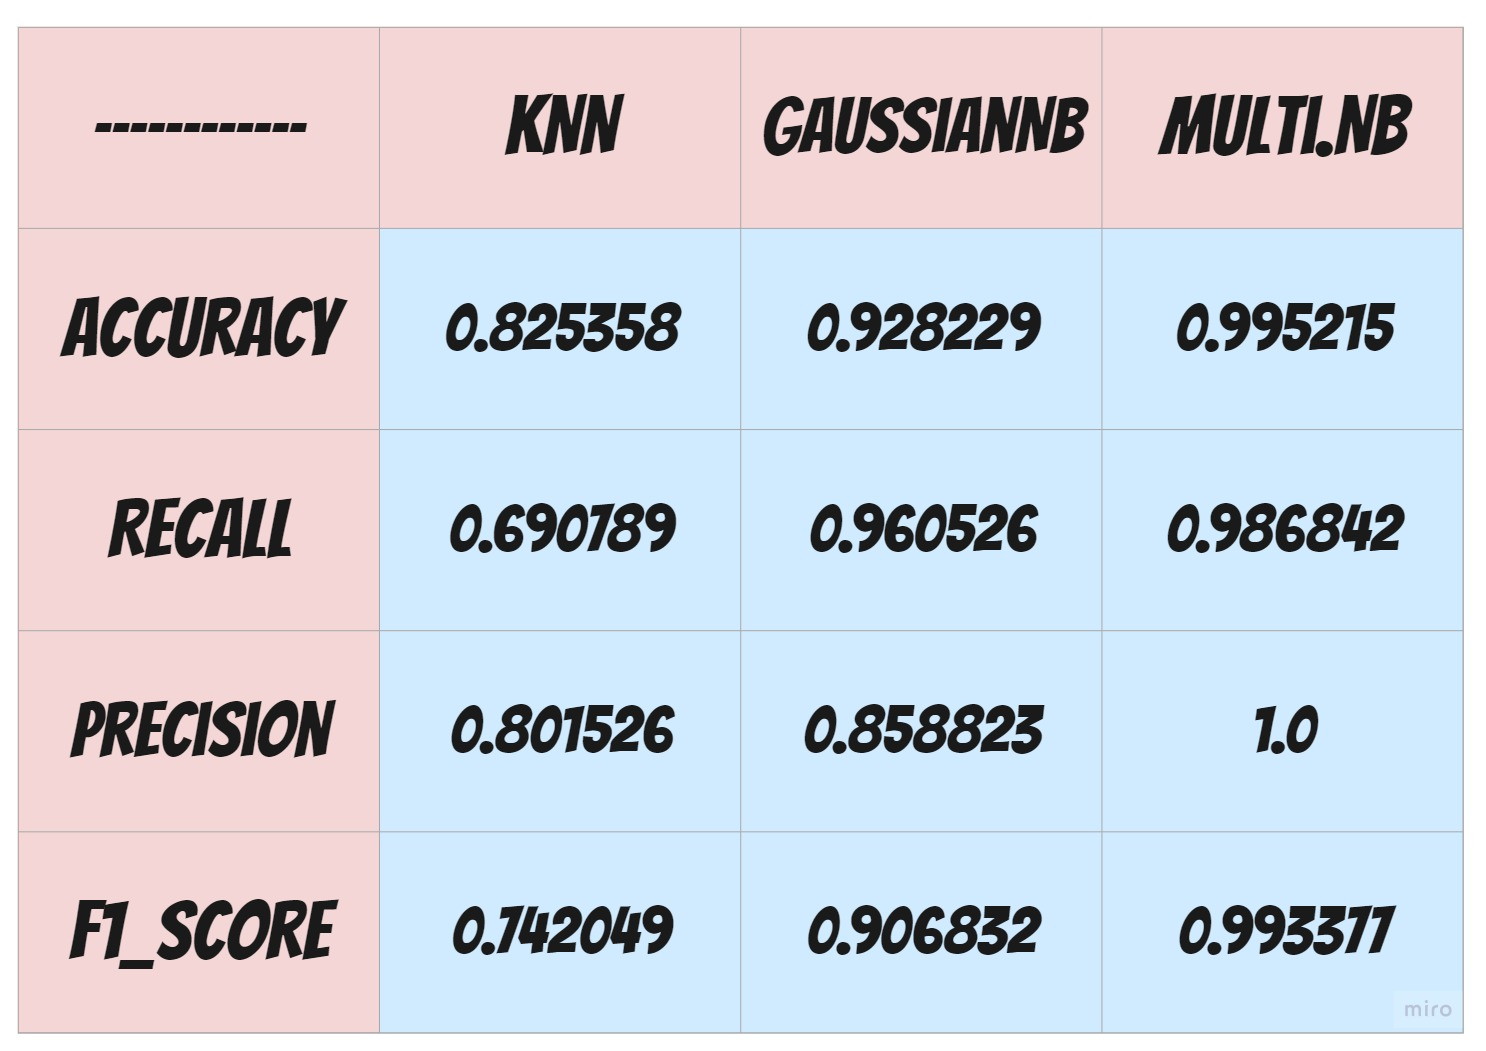